# Пожалуйста, выполните задачи ниже.

Вам может понадобиться больше узнать о методах, предоставляемых пакетом Numpy.

**Пожалуйста, не удаляйте комментарии !!!**

1. Импортируйте необходимые пакеты самостоятельно.

In [1]:
# Начало вашего кода
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Конец вашего кода
print(np)
print(pd)
print(plt)

<module 'numpy' from 'D:\\able\\lib\\site-packages\\numpy\\__init__.py'>
<module 'pandas' from 'D:\\able\\lib\\site-packages\\pandas\\__init__.py'>
<module 'matplotlib.pyplot' from 'D:\\able\\lib\\site-packages\\matplotlib\\pyplot.py'>


### Ожидаемый результат:

```
<module 'numpy' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/site-packages/numpy/__init__.py'>
<module 'pandas' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/site-packages/pandas/__init__.py'>
<module 'matplotlib.pyplot' from '/Users/st/anaconda3/envs/py36-ds/lib/python3.6/site-packages/matplotlib/pyplot.py'>
```

2. Прочитайте данные из "salaries.csv" в pandas.DataFrame.

In [2]:
# Начало вашего кода

with open('./salaries.csv') as f:
    data = pd.read_csv(f)
    
# Конец вашего кода
pd_data=data.copy()
data.head()


,salary,experience,gender,married,age
0,43003,>5,male,yes,29
1,22172,3-5,female,yes,28
2,15192,3-5,female,yes,28
3,42511,>5,male,no,24
4,17813,3-5,male,yes,27


### Ожидаемый результат:

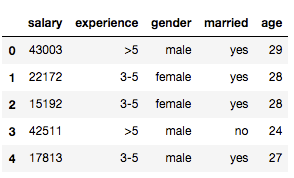

3. Пожалуйста, произведите следующий график, показанный ниже (ширина = 0,5): 

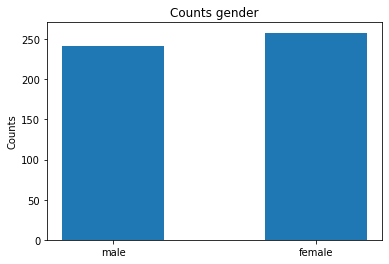

"total_gender = pd_data['gender'].value_counts()\nmale_number = total_gender['male']\nfemale_number = total_gender['female']"

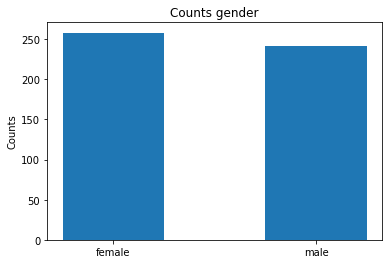

In [3]:
# Начало вашего кода
def plot_bar(data, column):
    uniq = data[column].value_counts()
    res_plot = plt.bar(x=[el for el in uniq.index.tolist()], height = [val for val in uniq.values.tolist()], width = 0.5)
    plt.title(f'Counts {column}')
    plt.ylabel('Counts')
    return res_plot

genders = plot_bar(pd_data, 'gender')

'''total_gender = pd_data['gender'].value_counts()
male_number = total_gender['male']
female_number = total_gender['female']'''
#print(female_number)

#plt.bar(x=['male','female'], height=[male_number, female_number], width = 0.5)
#plt.title('Counts gender')
#plt.ylabel('Counts')
# Конец вашего кода

4. Пожалуйста, произведите следующий график, показанный ниже (ширина = 0,5):

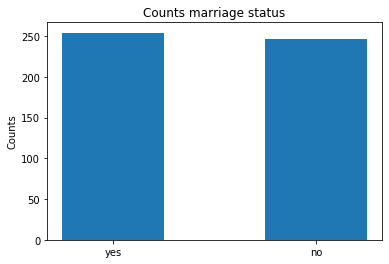

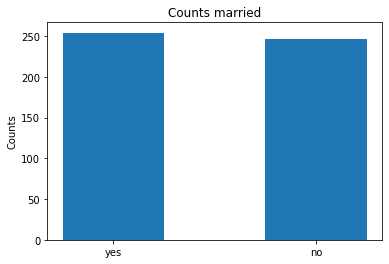

In [4]:
# Начало вашего кода
marriage_status = plot_bar(pd_data, 'married')
# Конец вашего кода

5. Пожалуйста, произведите следующий график, показанный ниже (ширина = 0,5):

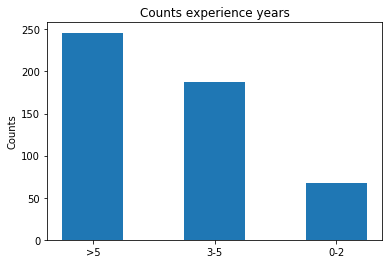

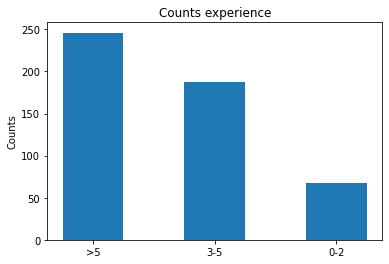

In [5]:
# Начало вашего кода
counts_exp_years = plot_bar(pd_data, 'experience')
# Конец вашего кода

6. Пожалуйста, произведите следующий график, показанный ниже (ширина = 0,5):

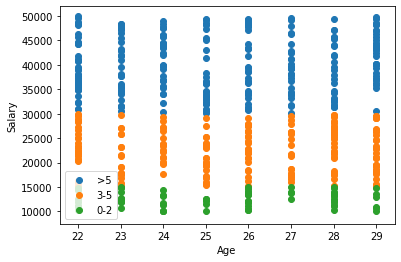

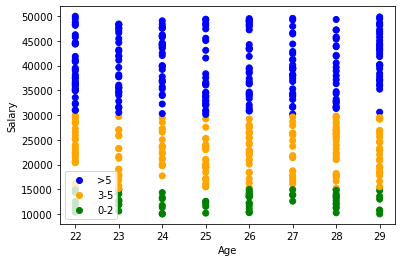

In [6]:
# Начало вашего кода
color_map = {'>5':'blue',
             '3-5':'orange',
              '0-2':'green'}
def map_color(experience):
    return color_map.get(experience, 'grey') #grey is default
colors = pd_data['experience'].apply(map_color)

plt.scatter(pd_data['age'], pd_data['salary'], c=colors)
plt.xlabel('Age')
plt.ylabel('Salary')
#legend
legend_labels = ['>5','3-5','0-2']
legend_handles = [plt.scatter([],[],c=color) for color in color_map.values()]
plt.legend(legend_handles, legend_labels)
# Конец вашего кода

7. Теперь, пожалуйста, объедините три графика выше в одну красивую фигуру, как показано ниже:


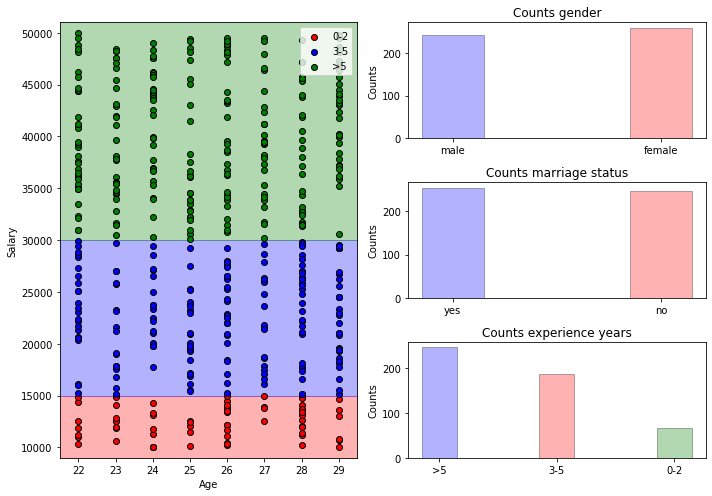

**Примечание:**

1. Размер ```figure``` установлен на (10,7)
2. $\alpha$ установлена 0.3 для всех subplots. 
3. для subplot Age vs Salary ```xlim - [21,5,29,5]```, а ```ylim - [9000,51000]```
4. Пожалуйста, проверьте метод ```tight_layout()```


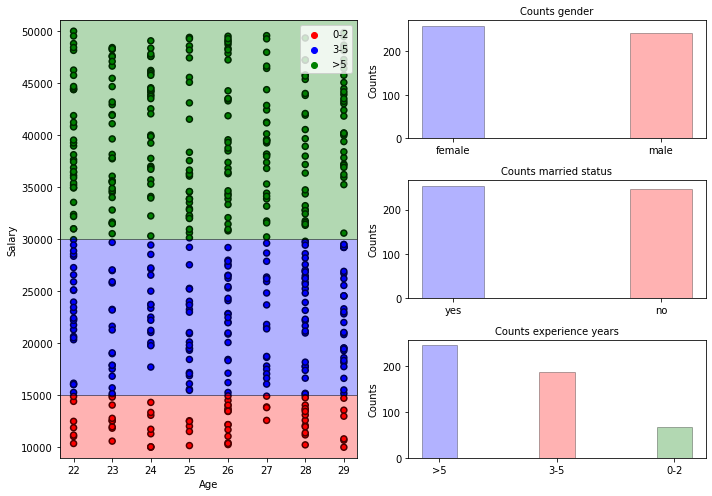

In [7]:
# Начало вашего кода
axs = []
fig = plt.figure(figsize=(10, 7))
axs.append(fig.add_subplot(1,2,1))
axs.append(fig.add_subplot(3,2,2))
axs.append(fig.add_subplot(3,2,4))
axs.append(fig.add_subplot(3,2,6))

for idx, ax in enumerate(axs,1):
    if idx==1:
        y=pd_data['salary']
        x=pd_data['age']
        experience=pd_data['experience']
        colors = {'0-2': 'r', '3-5': 'b', '>5': 'g'}
        ax.scatter(x,y, c=[colors[exp] for exp in experience],linewidths=1.5,edgecolor='k');
        ax.set_ylim(9000,51000)
        #ax.set_xlim(21,30)
        ax.set_xticks(range(22,29+1))
        ax.set_xlabel('Age');
        ax.set_ylabel('Salary');
        ax.axhspan(0, 15000, facecolor='red',alpha=0.3,edgecolor='k')
        ax.axhspan(15000,30000, facecolor='blue',alpha=0.3,edgecolor='k')
        ax.axhspan(30000, 51000, facecolor='green',alpha=0.3,edgecolor='k')
        legend_handles = [ax.scatter([], [], c=color, label=label) for label, color in colors.items()]
        ax.legend(handles=legend_handles, loc='upper right')
        
        
    elif idx==2:
        pd_data_gender=pd_data['gender'].value_counts()
        ax.bar(x=pd_data_gender.index.tolist(),height=pd_data_gender.values.tolist(),width=0.3,
               color=['b','r'],edgecolor='k',alpha=0.3)
        ax.set_title('Counts gender',fontsize=10)
        ax.set_ylabel('Counts')
        #ax.set_ylim(0,300)
        ax.set_yticks(range(0,250+1,100))
    elif idx==3:
        pd_data_married=pd_data['married'].value_counts()
        ax.bar(x=pd_data_married.index.tolist(),height=pd_data_married.values.tolist(),width=0.3,
               color=['b','r'],edgecolor='k',alpha=0.3)
        ax.set_title('Counts married status',fontsize=10)
        ax.set_ylabel('Counts')
        #ax.set_ylim(0,300)
        ax.set_yticks(range(0,250+1,100))
    else:
        pd_data_exper=pd_data['experience'].value_counts()
        ax.bar(x=pd_data_exper.index.tolist(),height=pd_data_exper.values.tolist(),width=0.3,
               color=['b','r','g'],edgecolor='k',alpha=0.3)
        ax.set_title('Counts experience years',fontsize=10)
        ax.set_ylabel('Counts')
        #ax.set_ylim(0,300)
        ax.set_yticks(range(0,250+1,100))

        
plt.tight_layout()
plt.show()

# Конец вашего кода

In [8]:
print(type(genders))

<class 'matplotlib.container.BarContainer'>


8. Пожалуйста, произведите следующий график, показанный ниже (размер figure установлен на (10,7)):

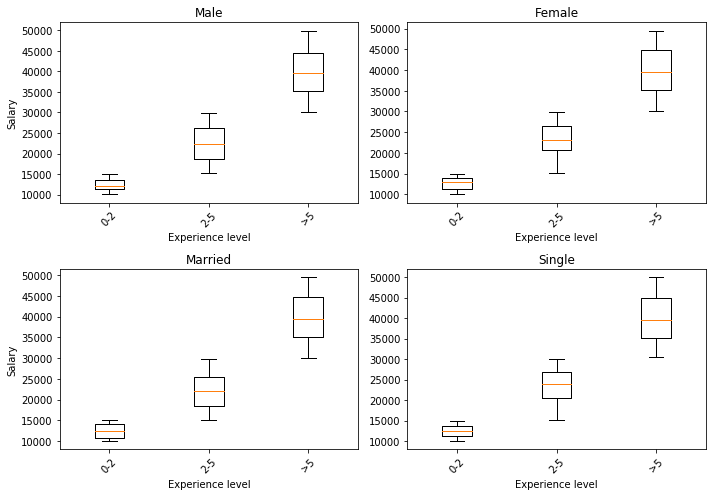


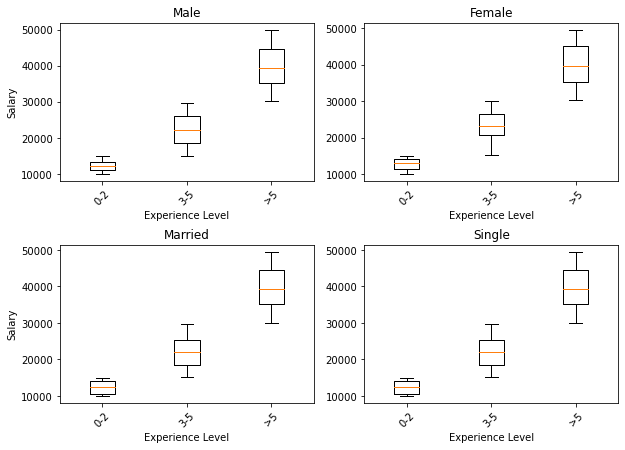

In [9]:
# Начало вашего кода
fig, axs = plt.subplots(2,2, figsize = (10,7))
male_0_2 =pd_data[(pd_data['gender']=='male') & (pd_data['experience']=='0-2')] 
male_3_5 = pd_data[(pd_data['gender']=='male') & (pd_data['experience']=='3-5')]
male_gt_5 = pd_data[(pd_data['gender']=='male') & (pd_data['experience']=='>5')]

data_male = [male_0_2['salary'], male_3_5['salary'], male_gt_5['salary']]
axs[0,0].boxplot(data_male, labels=['0-2', '3-5', '>5'])
axs[0,0].set_title('Male')
axs[0,0].set_xlabel('Experience Level')
axs[0,0].set_ylabel('Salary')
# Rotate the y-axis labels by 45 degrees
axs[0, 0].tick_params(axis='x', labelrotation=45)

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.4)


##second subplot
female_0_2 = pd_data[(pd_data['gender']=='female') & (pd_data['experience']=='0-2')]
female_3_5 = pd_data[(pd_data['gender']=='female') & (pd_data['experience']=='3-5')]
female_gt_5 = pd_data[(pd_data['gender']=='female') & (pd_data['experience']=='>5')]

data_female = [female_0_2['salary'], female_3_5['salary'], female_gt_5['salary']]
axs[0,1].boxplot(data_female, labels=['0-2', '3-5', '>5'])
axs[0,1].set_title('Female')
axs[0,1].set_xlabel('Experience Level')
#axs[0,1].set_ylabel('Salary')
# Rotate the y-axis labels by 45 degrees
axs[0,1].tick_params(axis='x', labelrotation=45)

##third subplot

married_0_2 = pd_data[(pd_data['married']=='yes') & (pd_data['experience']=='0-2')]
married_3_5 = pd_data[(pd_data['married']=='yes') & (pd_data['experience']=='3-5')]
married_gt_5 = pd_data[(pd_data['married']=='yes') & (pd_data['experience']=='>5')]

data_married = [married_0_2['salary'], married_3_5['salary'], married_gt_5['salary']]
axs[1,0].boxplot(data_married, labels=['0-2', '3-5', '>5'])
axs[1,0].set_title('Married')
axs[1,0].set_xlabel('Experience Level')
axs[1,0].set_ylabel('Salary')
# Rotate the y-axis labels by 45 degrees
axs[1,0].tick_params(axis='x', labelrotation=45)

##forth subplot
single_0_2 = pd_data[(pd_data['married']=='no') & (pd_data['experience']=='0-2')]
single_3_5 = pd_data[(pd_data['married']=='no') & (pd_data['experience']=='3-5')]
single_gt_5 = pd_data[(pd_data['married']=='no') & (pd_data['experience']=='>5')]

data_single = [single_0_2['salary'], single_3_5['salary'], single_gt_5['salary']]
axs[1,1].boxplot(data_married, labels=['0-2', '3-5', '>5'])
axs[1,1].set_title('Single')
axs[1,1].set_xlabel('Experience Level')
#axs[1,1].set_ylabel('Salary')
# Rotate the y-axis labels by 45 degrees
axs[1,1].tick_params(axis='x', labelrotation=45)

# Конец вашего кода

9. Пожалуйста, произведите следующий график, показанный ниже (размер figure установлен на (10,7)):

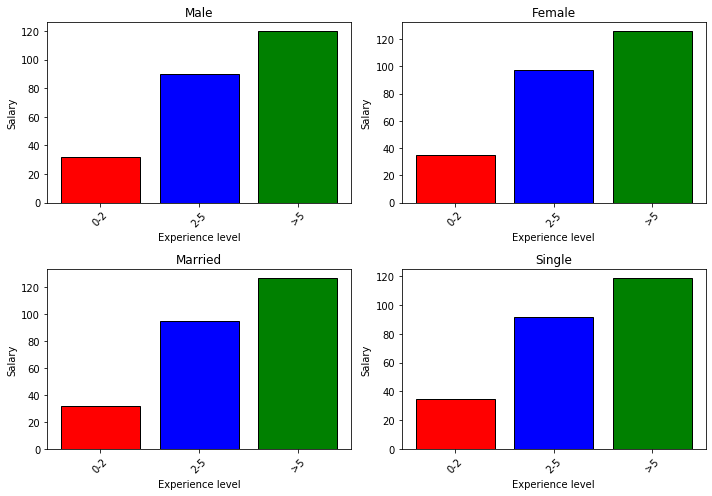

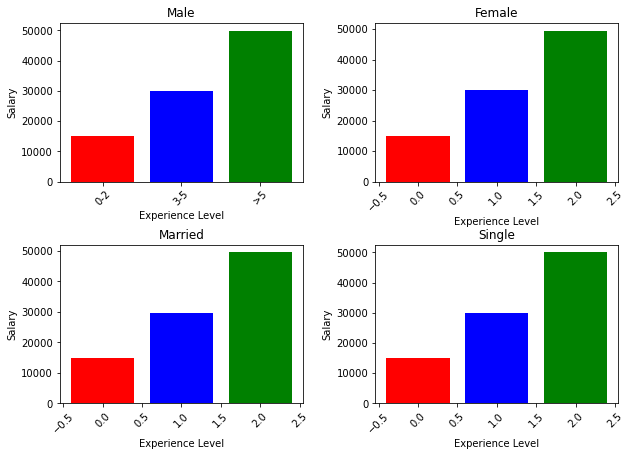

In [10]:
# Начало вашего кода

fig, axs = plt.subplots(2,2, figsize = (10, 7))

male_0_2 =pd_data[(pd_data['gender']=='male') & (pd_data['experience']=='0-2')] 
male_3_5 = pd_data[(pd_data['gender']=='male') & (pd_data['experience']=='3-5')]
male_gt_5 = pd_data[(pd_data['gender']=='male') & (pd_data['experience']=='>5')]

bar_colors = ['red', 'blue', 'green']

#data_male = np.array([male_0_2['salary'], male_3_5['salary'], male_gt_5['salary']])
data_male = [male_0_2['salary'], male_3_5['salary'], male_gt_5['salary']]

x_labels = ['0-2', '3-5', '>5']
x_positions = np.arange(len(x_labels))

#axs[0,0].bar(x = x_positions, height= data_male.T)
for i, data in enumerate(data_male):
    axs[0, 0].bar(x_positions[i], data, color=bar_colors[i])
axs[0,0].set_title('Male')
axs[0,0].set_xlabel('Experience Level')
axs[0,0].set_ylabel('Salary')
# Rotate the y-axis labels by 45 degrees
axs[0, 0].tick_params(axis='x', labelrotation=45)

axs[0, 0].set_xticks(x_positions)
axs[0, 0].set_xticklabels(x_labels)

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.3)



##second subplot
female_0_2 = pd_data[(pd_data['gender']=='female') & (pd_data['experience']=='0-2')]
female_3_5 = pd_data[(pd_data['gender']=='female') & (pd_data['experience']=='3-5')]
female_gt_5 = pd_data[(pd_data['gender']=='female') & (pd_data['experience']=='>5')]



data_female = [female_0_2['salary'], female_3_5['salary'], female_gt_5['salary']]
for i, data in enumerate(data_female):
    axs[0,1].bar(x_positions[i], data, color=bar_colors[i])
axs[0,1].set_title('Female')
axs[0,1].set_xlabel('Experience Level')
axs[0,1].set_ylabel('Salary')
# Rotate the y-axis labels by 45 degrees
axs[0,1].tick_params(axis='x', labelrotation=45)

##third subplot

married_0_2 = pd_data[(pd_data['married']=='yes') & (pd_data['experience']=='0-2')]
married_3_5 = pd_data[(pd_data['married']=='yes') & (pd_data['experience']=='3-5')]
married_gt_5 = pd_data[(pd_data['married']=='yes') & (pd_data['experience']=='>5')]

data_married = [married_0_2['salary'], married_3_5['salary'], married_gt_5['salary']]
for i, data in enumerate(data_married):
    axs[1,0].bar(x_positions[i], data, color=bar_colors[i])
axs[1,0].set_title('Married')
axs[1,0].set_xlabel('Experience Level')
axs[1,0].set_ylabel('Salary')
# Rotate the y-axis labels by 45 degrees
axs[1,0].tick_params(axis='x', labelrotation=45)

##forth subplot
single_0_2 = pd_data[(pd_data['married']=='no') & (pd_data['experience']=='0-2')]
single_3_5 = pd_data[(pd_data['married']=='no') & (pd_data['experience']=='3-5')]
single_gt_5 = pd_data[(pd_data['married']=='no') & (pd_data['experience']=='>5')]

data_single = [single_0_2['salary'], single_3_5['salary'], single_gt_5['salary']]
for i,data in enumerate(data_single):
    axs[1,1].bar(x_positions[i], data, color=bar_colors[i])
axs[1,1].set_title('Single')
axs[1,1].set_xlabel('Experience Level')
axs[1,1].set_ylabel('Salary')
# Rotate the y-axis labels by 45 degrees
axs[1,1].tick_params(axis='x', labelrotation=45)
# Конец вашего кода

C:\Users\User\AppData\Local\Temp\ipykernel_14532\2218581930.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(exp, rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_14532\2218581930.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(exp, rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_14532\2218581930.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(exp, rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_14532\2218581930.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(exp, rotation=45)


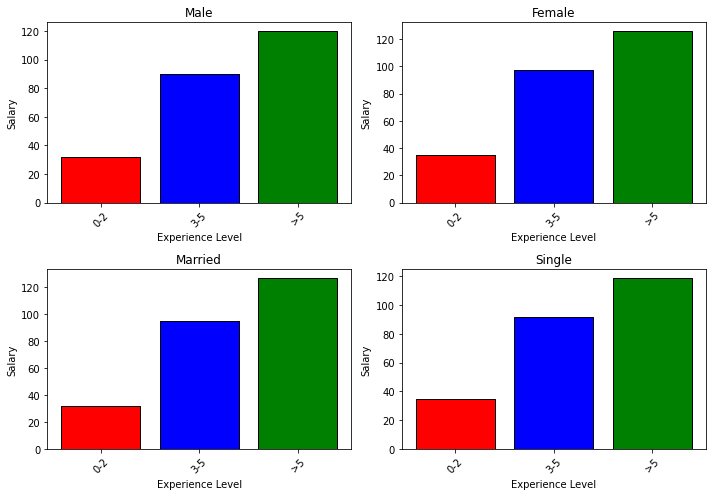

In [13]:
axs=[]
fig=plt.figure(figsize=(10,7))
axs.append(fig.add_subplot(2,2,1))
axs.append(fig.add_subplot(2,2,2))
axs.append(fig.add_subplot(2,2,3))
axs.append(fig.add_subplot(2,2,4))

for idx, ax in enumerate(axs,1):
    if idx==1:
        male = pd_data[pd_data['gender'] == 'male']
        male_table = male.groupby('experience').agg({'salary': ['count']}).reset_index()
        exp=male_table['experience'].tolist()
        male_salary=male_table['salary']['count'].tolist()
        ax.bar(x=exp,height=male_salary,width=0.8,color=['r','b','g'],edgecolor='k')
        ax.set_xticklabels(exp, rotation=45)
        ax.set_xlabel('Experience Level')
        ax.set_ylabel('Salary')
        ax.set_title('Male')
    if idx==2:
        female = pd_data[pd_data['gender'] == 'female']
        female_table = female.groupby('experience').agg({'salary': ['count']}).reset_index()
        female_salary=female_table['salary']['count'].tolist()
        ax.bar(x=exp,height=female_salary,width=0.8,color=['r','b','g'],edgecolor='k')
        ax.set_xticklabels(exp, rotation=45)
        ax.set_xlabel('Experience Level')
        ax.set_ylabel('Salary')
        ax.set_title('Female')
    if idx==3:
        married=pd_data[pd_data['married'] == 'yes']
        married_table=married.groupby('experience').agg({'salary': ['count']}).reset_index()
        married_salary=married_table['salary']['count'].tolist()
        ax.bar(x=exp,height=married_salary,width=0.8,color=['r','b','g'],edgecolor='k')
        ax.set_xticklabels(exp, rotation=45)
        ax.set_xlabel('Experience Level')
        ax.set_ylabel('Salary')
        ax.set_title('Married')
    if idx==4:
        single=pd_data[pd_data['married'] == 'no']
        single_table=single.groupby('experience').agg({'salary': ['count']}).reset_index()
        single_salary=single_table['salary']['count'].tolist()
        ax.bar(x=exp,height=single_salary,width=0.8,color=['r','b','g'],edgecolor='k')
        ax.set_xticklabels(exp, rotation=45)
        ax.set_xlabel('Experience Level')
        ax.set_ylabel('Salary')
        ax.set_title('Single')   
        
plt.tight_layout()        
plt.show()

10. Пожалуйста, произведите следующий график, показанный ниже:

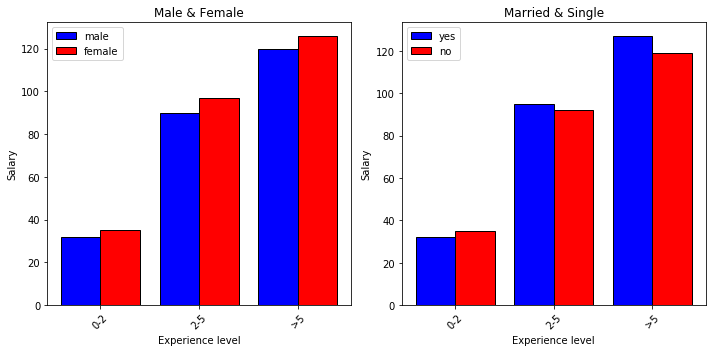

**Примечание:**

1. Размер figure установлен на ```(10,5)```
2. Пожалуйста, проверьте метод ```tight_layout()```
3. ```width=0.4```

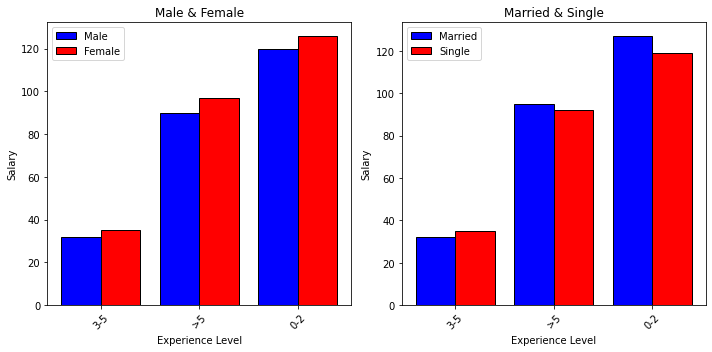

In [14]:
# Начало вашего кода
axs=[]
fig=plt.figure(figsize=(10,5))
axs.append(fig.add_subplot(1,2,1))
axs.append(fig.add_subplot(1,2,2))
exp = set(pd_data['experience'].tolist())
x_values = np.arange(len(exp))
bar_width = 0.4
for idx, ax in enumerate(axs,1):
    if idx==1:
        exp = set(pd_data['experience'].tolist())
        ax.bar(x=x_values-bar_width/2,height=male_salary,width=0.4,color=['b'],edgecolor='k', label='Male')
        ax.bar(x=x_values+bar_width/2,height=female_salary,width=0.4,color=['r'],edgecolor='k', label='Female')
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(exp, rotation=45) 
        ax.set_xlabel('Experience Level')
        ax.set_ylabel('Salary')
        ax.set_title('Male & Female')   
        ax.legend()
    if idx==2:
        exp = set(pd_data['experience'].tolist())
        ax.bar(x=x_values-bar_width/2,height=married_salary,width=0.4,color=['b'],edgecolor='k',label='Married')
        ax.bar(x=x_values+bar_width/2,height=single_salary,width=0.4,color=['r'],edgecolor='k',label='Single')
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(exp, rotation=45) 
        ax.set_xlabel('Experience Level')
        ax.set_ylabel('Salary')
        ax.set_title('Married & Single')   
        ax.legend()   
plt.tight_layout()        
plt.show()         
# Конец вашего кода

# Прекрасная работа!